<a href="https://colab.research.google.com/github/Johnnereparambil/git_john/blob/CIFAR-10-Deep-Learning-Model/CIFAR_10_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import cifar10

In [4]:
(train_images, _), (test_images, _) = cifar10.load_data()

In [5]:
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

In [6]:
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [7]:
print(train_images.shape)

(50000, 32, 32, 3, 1)


In [8]:
noise_factor = 0.35
train_noisy = train_images + noise_factor * tf.random.normal(shape=train_images.shape)
test_noisy = test_images + noise_factor * tf.random.normal(shape=test_images.shape)


In [9]:
train_noisy = tf.clip_by_value(train_noisy, clip_value_min=0., clip_value_max=1.)
test_noisy = tf.clip_by_value(test_noisy, clip_value_min=0., clip_value_max=1.)


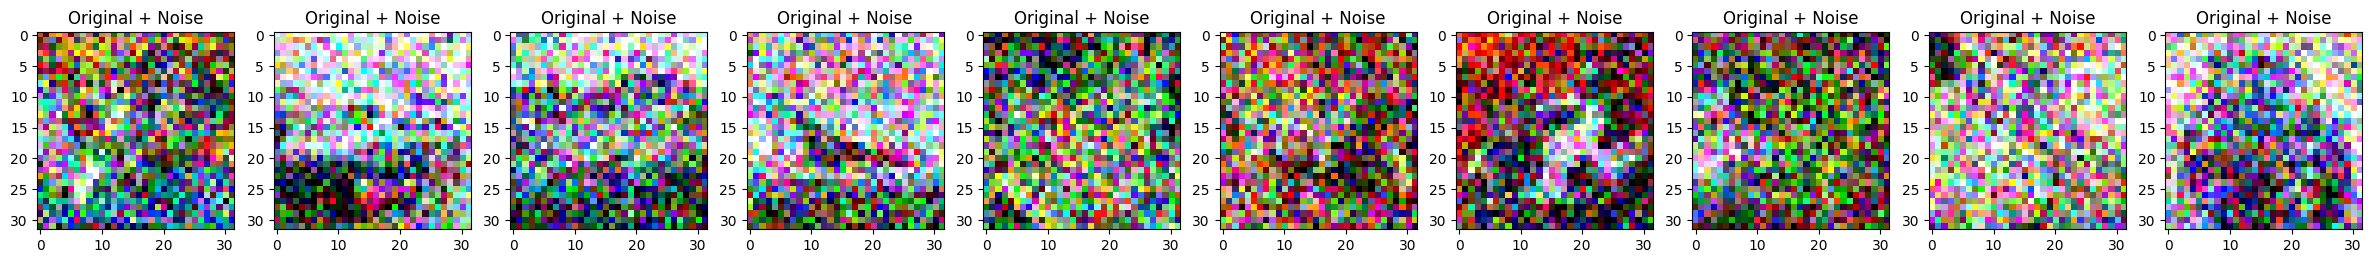

In [10]:
num_samples = 10
plt.figure(figsize=(30, 3))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.title("Original + Noise")
    plt.imshow(tf.squeeze(test_noisy[i]))
    plt.gray()
plt.show()

In [11]:
class Denoise(tf.keras.Model):
    def __init__(self):
        super(Denoise, self).__init__()

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(32, 32, 3)),  # Adjust input shape for CIFAR-10
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=1)])

        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=1, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')])  # Adjust output channels to 3 for CIFAR-10

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [12]:
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [13]:
autoencoder.fit(train_noisy, train_images, epochs=10, shuffle=True, validation_data=(test_noisy, test_images))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0170 - val_loss: 0.0087
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0075 - val_loss: 0.0078


In [14]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 8)           │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,608 (6.28 KB)

 Trainable params: 1,608 (6.28 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 3)           │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,187 (8.54 KB)

 Trainable params: 2,187 (8.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
encoded_imgs = autoencoder.encoder(test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


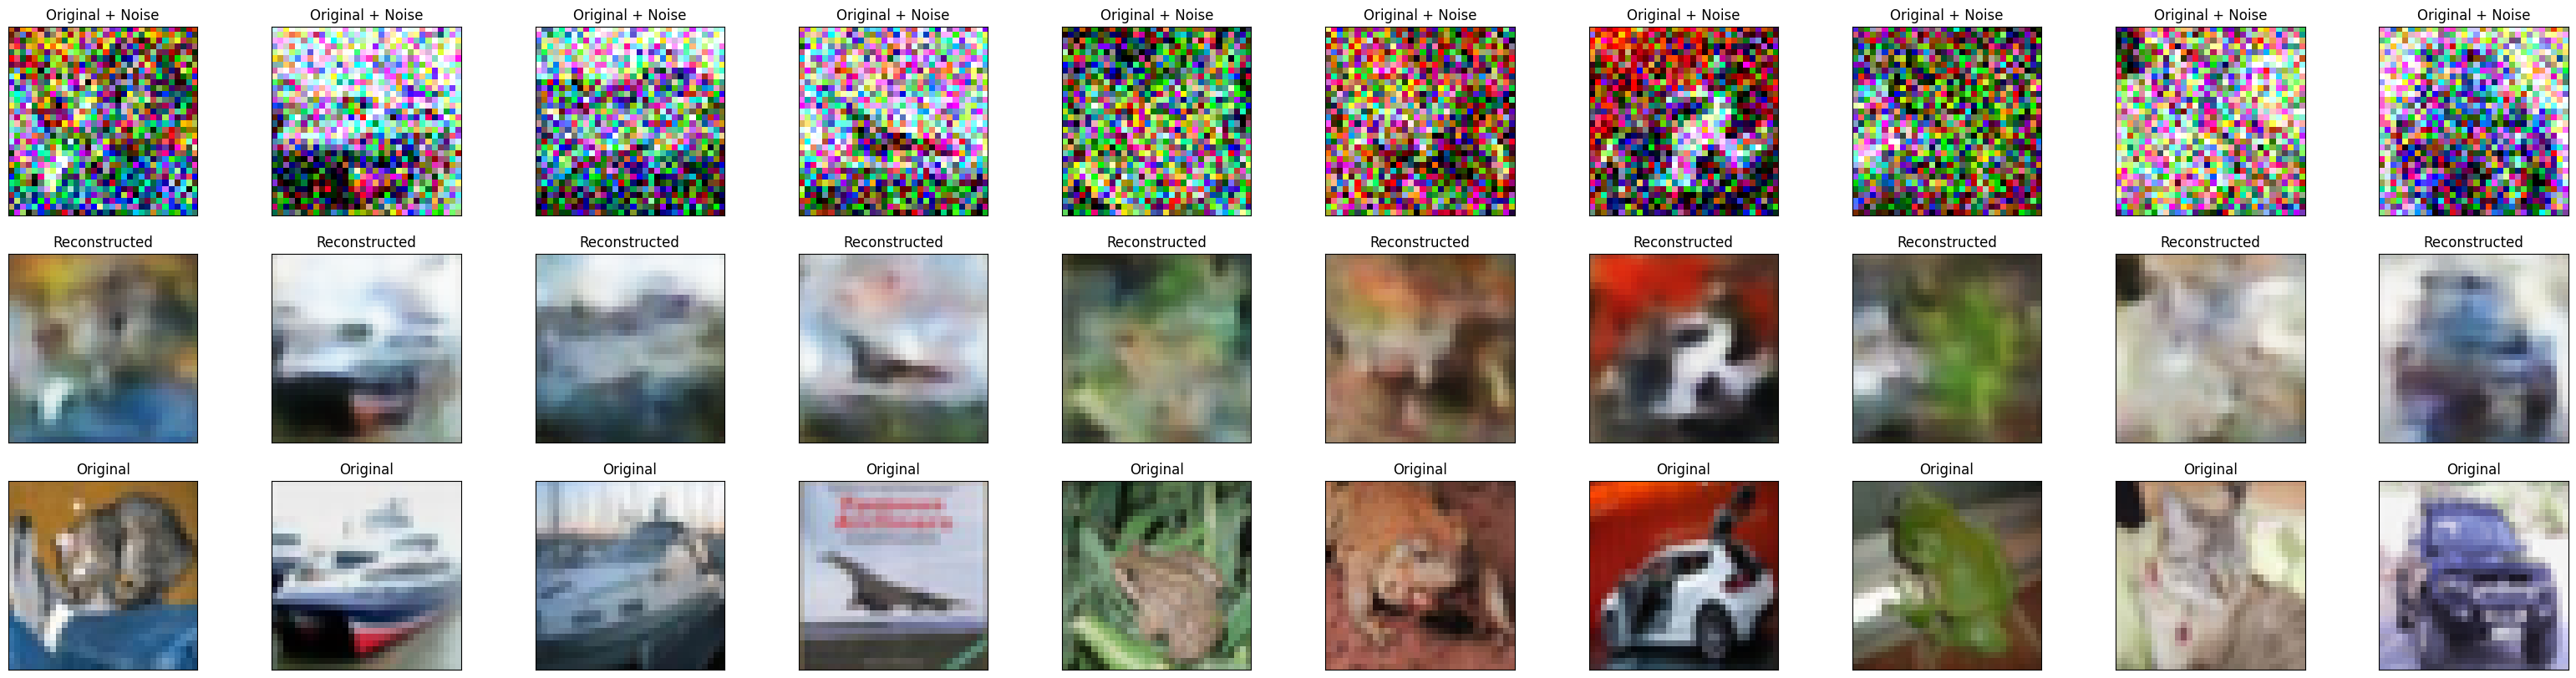

In [17]:
encoded_imgs = autoencoder.encoder(test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
plt.figure(figsize=(40, 10))
for i in range(num_samples):
    ax = plt.subplot(3, num_samples, i + 1)
    plt.title("Original + Noise")
    plt.imshow(tf.squeeze(test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(3, num_samples, i + num_samples + 1)
    plt.title("Reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    ox = plt.subplot(3, num_samples, i + num_samples + num_samples + 1)
    plt.title("Original")
    plt.imshow(tf.squeeze(test_images[i]))
    plt.gray()
    ox.get_xaxis().set_visible(False)
    ox.get_yaxis().set_visible(False)
plt.show()